# Load the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datetime


import yfinance as yf

from API import NEWS_API
from newsapi import NewsApiClient


import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.preprocessing import MinMaxScaler

# Choosing the dates

In [120]:
TRAIN_START_DATE = '2000-01-01'
TRAIN_END_DATE = '2022-12-31'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2025-01-01'

# Choosing the symbols

In [121]:
symbols = {
    'MSFT',
    'NVDA',
    'META',
    'AAPL'
}

# Load the train data

In [122]:
train_data = {}

for symbol in symbols:
    train_data[symbol] = yf.download(
                            symbol, 
                            start=TRAIN_START_DATE, 
                            end=TRAIN_END_DATE, 
                            interval="1d"
                        )

print(train_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2000-01-03   35.792301   36.425623   34.391316   36.041792  53228400
2000-01-04   34.583233   35.965027   34.468083   34.871107  54119000
2000-01-05   34.947872   35.734727   33.585270   34.122634  64059600
2000-01-06   33.777195   34.967073   33.278214   34.448901  54976600
2000-01-07   34.218590   34.468080   32.951945   33.354969  62013600
...                ...         ...         ...         ...       ...
2022-12-23  234.405411  234.542874  229.702188  231.832877  21207000
2022-12-27  232.667480  234.601780  231.557946  234.375951  16688600
2022-12-28  230.281479  235.377464  229.928000  232.598728  17457100
2022-12-29  236.644135  237.537654  231.381230  231.381230  19770700
2022-12-30  235.475677  235.613141  232.372917  233.894842  21938500

[5787 rows x 5 columns]


# Check the columns

In [123]:
print(train_data['NVDA'].columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


# Load the test data

In [124]:
test_data = {}

for symbol in symbols:
    test_data[symbol] = yf.download(
                            symbol, 
                            start=TEST_START_DATE, 
                            end=TEST_END_DATE, 
                            interval="1d"
                        )
print(test_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2023-01-03  235.240021  241.298250  233.099504  238.676618  25740000
2023-01-04  224.949875  228.651571  221.866756  228.072262  50623400
2023-01-05  218.282867  223.427951  217.742828  223.084285  39585600
2023-01-06  220.855392  221.670359  215.376487  218.960362  43613600
2023-01-09  223.005722  227.051099  222.308592  222.347861  27369800
...                ...         ...         ...         ...       ...
2024-12-24  438.450836  438.720315  433.321138  433.780209   7164500
2024-12-26  437.233276  440.057630  435.756258  438.201337   8194200
2024-12-27  429.668457  434.349074  425.496829  433.730320  18117700
2024-12-30  423.979858  426.694417  421.055729  425.207408  13158700
2024-12-31  420.656525  425.876070  419.818209  425.247326  13246500

[502 rows x 5 columns]


# Load the news with newsapi.org - only the previous month

In [96]:
newsapi = NewsApiClient(api_key=NEWS_API)

In [97]:
news_data = newsapi.get_everything(q = "Microsoft", language="en", page_size=20)

In [98]:
articles = news_data['articles']
news_df = pd.DataFrame(articles)

In [99]:
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Wes Davis,Microsoft’s new Dragon Copilot is an AI assist...,Microsoft has announced Microsoft Dragon Copil...,https://www.theverge.com/news/622528/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-03-03T18:22:43Z,Dragon Copilot offers dictation and ambient li...
1,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft is testing free Office for Windows a...,Microsoft has started testing a free version o...,https://www.theverge.com/news/618278/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-25T09:58:17Z,"The free desktop versions of Word, Excel, and ..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft is shutting down Skype in favor of T...,It’s the end of an era. Microsoft is shutting ...,https://www.theverge.com/news/621353/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-28T14:22:43Z,"Skype will be retired on May 5th, and existing..."
3,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft releases a Copilot app for Mac,Microsoft is releasing a native Copilot app fo...,https://www.theverge.com/news/621114/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-27T20:42:04Z,The Copilot app on iPhone and iPad is also bei...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft makes Copilot Voice and Think Deeper...,Microsoft made OpenAI’s o1 reasoning model fre...,https://www.theverge.com/news/619199/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-25T17:53:48Z,You wont hit any limits using OpenAIs o1 reaso...
5,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft announces quantum computing breakthr...,Microsoft believes it has made a key breakthro...,https://www.theverge.com/news/614205/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-19T13:56:29Z,Microsoft has spent 17 years researching a new...
6,"{'id': 'the-verge', 'name': 'The Verge'}",Tom Warren,Microsoft’s Xbox AI era starts with a model th...,I reported in November that Microsoft was abou...,https://www.theverge.com/news/615048/microsoft...,https://platform.theverge.com/wp-content/uploa...,2025-02-19T16:03:06Z,Microsoft Research and Xbox game studio Ninja ...
7,"{'id': 'wired', 'name': 'Wired'}",Julian Chokkattu,Gear News of the Week: Skype Will Close for Go...,Plus: The FDA clears Google’s Loss of Pulse fe...,https://www.wired.com/story/photoshop-finally-...,https://media.wired.com/photos/67c26ff90f06634...,2025-03-01T11:00:00Z,Pour out a little liquor. Microsoft has announ...
8,"{'id': None, 'name': 'Gizmodo.com'}",AJ Dellinger,Microsoft Study Finds Relying on AI Kills Your...,Researchers from Microsoft and Carnegie Mellon...,https://gizmodo.com/microsoft-study-finds-rely...,https://gizmodo.com/app/uploads/2024/08/chatgp...,2025-02-10T19:50:01Z,Artificial intelligence may one day make human...
9,"{'id': None, 'name': 'Gizmodo.com'}",Kyle Barr,"Microsoft Plans to Kill Skype, but Did It Ever...",Microsoft will take Skype offline on May 5 and...,https://gizmodo.com/microsoft-plans-to-kill-sk...,https://gizmodo.com/app/uploads/2019/08/x7srfg...,2025-02-28T16:00:29Z,Skype is going to go the way of Dodo in a few ...


# Merge the train and test data and preprocess them

In [125]:
train_close_list = []
for symbol in symbols:
    tmp = train_data[symbol]['Close']
    train_close_list.append(tmp)

train_merged = pd.concat(train_close_list, axis=1)
train_merged.dropna(inplace=True)

print("Train merged shape:", train_merged.shape)
print(train_merged.head())

Train merged shape: (2673, 4)
Ticker          NVDA       META       MSFT       AAPL
Date                                                 
2012-05-18  0.276960  38.084522  23.350183  15.961044
2012-05-21  0.281774  33.900505  23.733109  16.890924
2012-05-22  0.278335  30.882032  23.741083  16.761230
2012-05-23  0.285214  31.878227  23.222551  17.170200
2012-05-24  0.277647  32.904305  23.190641  17.012510


In [126]:
test_close_list = []
for symbol in symbols:
    tmp = test_data[symbol]['Close']
    test_close_list.append(tmp)

test_merged = pd.concat(test_close_list, axis=1)
test_merged.dropna(inplace=True)

print("Test merged shape:", test_merged.shape)
print(test_merged.head())

Test merged shape: (502, 4)
Ticker           NVDA        META        MSFT        AAPL
Date                                                     
2023-01-03  14.304595  124.265312  235.240021  123.632530
2023-01-04  14.738281  126.885307  224.949875  124.907700
2023-01-05  14.254632  126.456947  218.282867  123.583092
2023-01-06  14.848201  129.525223  220.855392  128.130219
2023-01-09  15.616640  128.977310  223.005722  128.654144


# Scale the data

In [127]:
scaler = MinMaxScaler(feature_range=(0, 1))


train_values = train_merged.values
test_values = test_merged.values


scaler.fit(train_values)


train_scaled = scaler.transform(train_values)
test_scaled = scaler.transform(test_values)

print("Scaled train shape:", train_scaled.shape)
print("Scaled test shape:", test_scaled.shape)

Scaled train shape: (2673, 4)
Scaled test shape: (502, 4)


# Predict the price when looking back 60 day ago

In [141]:
def create_sequences_multisymbol(dataset, lookback=60):
    """
    dataset: NumPy array of shape (num_days, 4) for 4 symbols
    lookback: number of timesteps to use as input
    
    Returns X, y:
      X.shape = (num_samples, lookback, 4)
      y.shape = (num_samples, 4)
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        seq_X = dataset[i : i + lookback]
        seq_y = dataset[i + lookback]
        X.append(seq_X)
        y.append(seq_y)
    return np.array(X), np.array(y)

lookback_window = 60
X_train_all, y_train_all = create_sequences_multisymbol(train_scaled, lookback_window)
X_test_all, y_test_all = create_sequences_multisymbol(test_scaled, lookback_window)

print("X_train_all shape:", X_train_all.shape)
print("y_train_all shape:", y_train_all.shape) 

print("X_test_all shape:", X_test_all.shape)
print("y_test_all shape:", y_test_all.shape)


X_train_all shape: (2613, 60, 4)
y_train_all shape: (2613, 4)
X_test_all shape: (442, 60, 4)
y_test_all shape: (442, 4)


# Build model

In [177]:
model = keras.Sequential([
    layers.Input(shape=(lookback_window, 4)),
    # First LSTM layer returns the entire sequence for the next LSTM
    layers.LSTM(64, return_sequences=True),
    # Second LSTM layer returns the final output
    layers.LSTM(64, return_sequences=False),
    # Dense layer for your final output (4 symbols)
    layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 60, 64)            17664     
                                                                 
 lstm_75 (LSTM)              (None, 64)                33024     
                                                                 
 dense_38 (Dense)            (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


# Train model

In [178]:
history = model.fit(
    X_train_all,
    y_train_all,
    epochs=20,
    batch_size=32,
    validation_split=0.1,   # 10% of training data used for validation
    verbose=1
)

Epoch 1/20
74/74 [==============================] - 5s 42ms/step - loss: 0.0073 - val_loss: 0.0140
Epoch 2/20
74/74 [==============================] - 3s 36ms/step - loss: 5.6675e-04 - val_loss: 0.0059
Epoch 3/20
74/74 [==============================] - 3s 37ms/step - loss: 4.4225e-04 - val_loss: 0.0045
Epoch 4/20
74/74 [==============================] - 3s 35ms/step - loss: 3.3319e-04 - val_loss: 0.0035
Epoch 5/20
74/74 [==============================] - 3s 35ms/step - loss: 3.2079e-04 - val_loss: 0.0030
Epoch 6/20
74/74 [==============================] - 3s 35ms/step - loss: 3.0474e-04 - val_loss: 0.0032
Epoch 7/20
74/74 [==============================] - 3s 35ms/step - loss: 2.8829e-04 - val_loss: 0.0048
Epoch 8/20
74/74 [==============================] - 3s 35ms/step - loss: 2.9871e-04 - val_loss: 0.0028
Epoch 9/20
74/74 [==============================] - 3s 35ms/step - loss: 3.0825e-04 - val_loss: 0.0040
Epoch 10/20
74/74 [==============================] - 3s 37ms/step - loss: 2.7

In [179]:
pred_scaled = model.predict(X_test_all)       # shape = (num_samples, 4)
y_test_pred = scaler.inverse_transform(pred_scaled)
y_test_true = scaler.inverse_transform(y_test_all)

print("Predicted shape:", y_test_pred.shape)
print("Actual shape:", y_test_true.shape)

# Print the first few predictions vs actual
for i in range(10):
    print(f"Day {i}: ")
    print("  Predicted:", y_test_pred[i])
    print("  Actual:   ", y_test_true[i])

14/14 [==============================] - 1s 14ms/step
Predicted shape: (442, 4)
Actual shape: (442, 4)
Day 0: 
  Predicted: [ 26.560665 214.57892  277.28555  162.53864 ]
  Actual:    [ 27.36774445 207.04908752 279.60302734 160.73898315]
Day 1: 
  Predicted: [ 26.729408 215.4926   278.53912  163.18924 ]
  Actual:    [ 27.76152802 211.13348389 283.78646851 163.25360107]
Day 2: 
  Predicted: [ 26.941675 216.79019  280.1344   164.11772 ]
  Actual:    [ 27.94941902 212.25920105 282.73324585 164.51095581]
Day 3: 
  Predicted: [ 27.163958 218.23734  281.75742  165.16289 ]
  Actual:    [ 27.43770409 213.90290833 282.68399048 163.97634888]
Day 4: 
  Predicted: [ 27.324348 219.75002  283.16653  166.1128  ]
  Actual:    [ 26.86602402 210.67523193 279.88851929 162.125     ]
Day 5: 
  Predicted: [ 27.375946 220.85088  284.05267  166.7359  ]
  Actual:    [ 27.02193832 215.27766418 287.03482056 163.01602173]
Day 6: 
  Predicted: [ 27.408382 222.1225   285.0934   167.34099 ]
  Actual:    [ 27.56363487

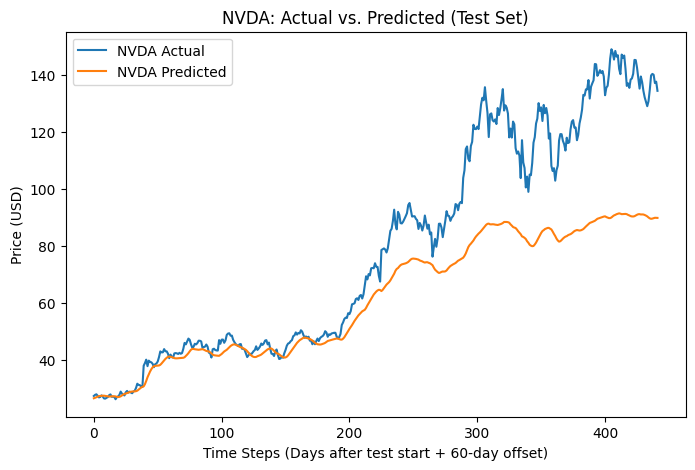

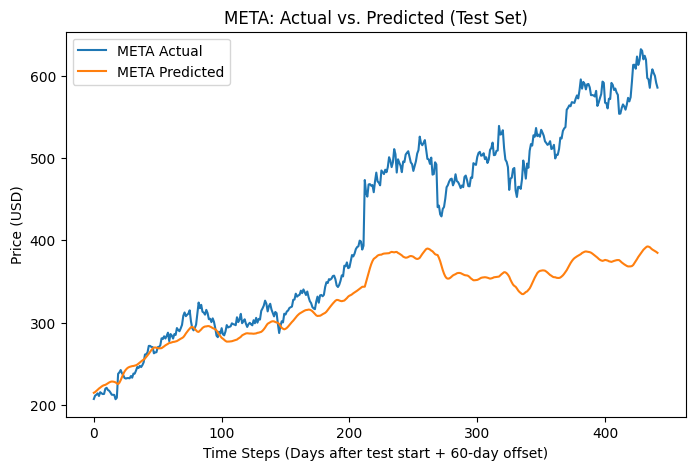

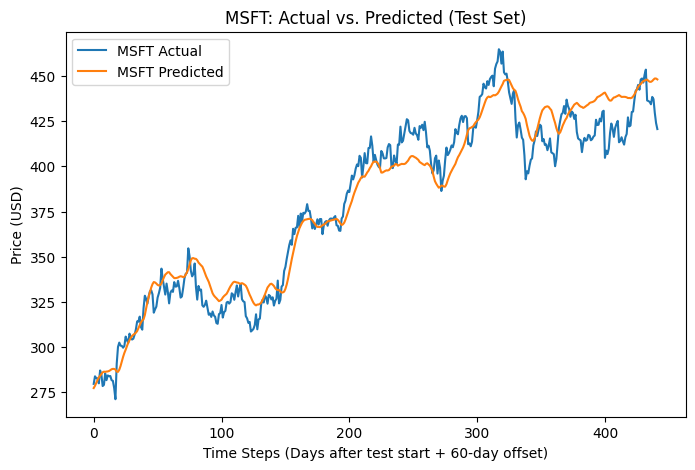

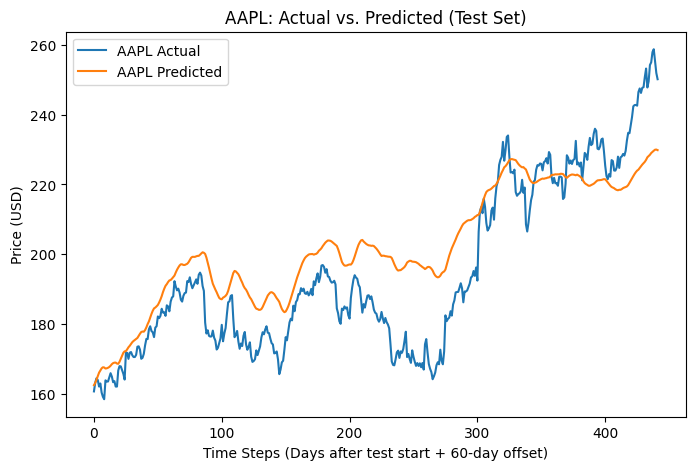

In [180]:

for i, symbol in enumerate(symbols):
    # Extract actual vs. predicted for this symbol (i)
    actual = y_test_true[:, i]
    predicted = y_test_pred[:, i]

    plt.figure(figsize=(8, 5))
    plt.plot(actual, label=f"{symbol} Actual")
    plt.plot(predicted, label=f"{symbol} Predicted")
    plt.legend()
    plt.title(f"{symbol}: Actual vs. Predicted (Test Set)")
    plt.xlabel("Time Steps (Days after test start + 60-day offset)")
    plt.ylabel("Price (USD)")
    plt.show()


In [181]:

def to_percentage_changes(price_array):
    """
    Convert an (N, 4) array of prices into (N-1, 4) array of daily % changes.
    """
    # Numerator: price_array[1:] - price_array[:-1]
    # Denominator: price_array[:-1]
    pct_changes = (price_array[1:] - price_array[:-1]) / price_array[:-1] * 100
    return pct_changes

# Transform actuals and predictions into % changes
y_test_true_pct = to_percentage_changes(y_test_true)
y_test_pred_pct = to_percentage_changes(y_test_pred)

# Now build a DataFrame for easier comparison
symbols_list = sorted(symbols)  # Make sure to have a consistent symbol order
comparison_df = pd.DataFrame()

for i, sym in enumerate(symbols_list):
    comparison_df[f'{sym}_Actual_%']    = y_test_true_pct[:, i]
    comparison_df[f'{sym}_Predicted_%'] = y_test_pred_pct[:, i]

# Inspect the first few rows
print(comparison_df.head(10))

   AAPL_Actual_%  AAPL_Predicted_%  META_Actual_%  META_Predicted_%  \
0       1.438860          0.635312       1.972671          0.425802   
1       0.676804          0.794133       0.533178          0.602152   
2      -1.830861          0.825050       0.774387          0.667532   
3      -2.083557          0.590455      -1.508945          0.693135   
4       0.580340          0.188834       2.184610          0.500960   
5       2.004655          0.118485      -0.624718          0.575783   
6      -1.486629          0.191428      -0.419085          0.469155   
7      -2.480781          0.000069       0.070143          0.296759   
8      -0.120778         -0.295602       2.967290          0.185306   
9       1.114766         -0.338840       0.517354          0.398655   

   MSFT_Actual_%  MSFT_Predicted_%  NVDA_Actual_%  NVDA_Predicted_%  
0       1.496207          0.452087       1.564411          0.400277  
1      -0.371132          0.572730       0.770185          0.568960  
2      -

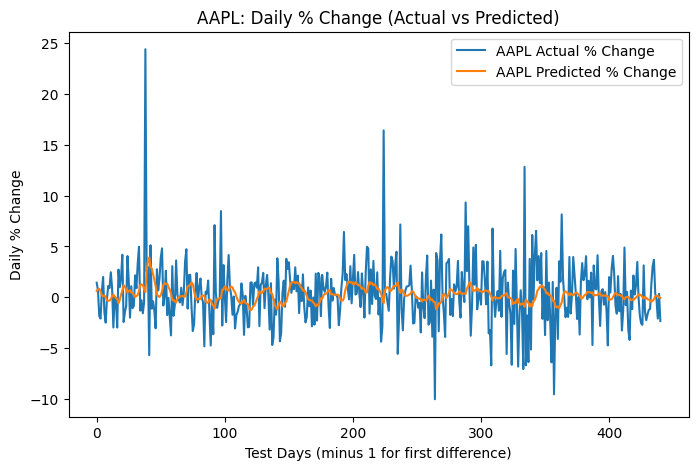

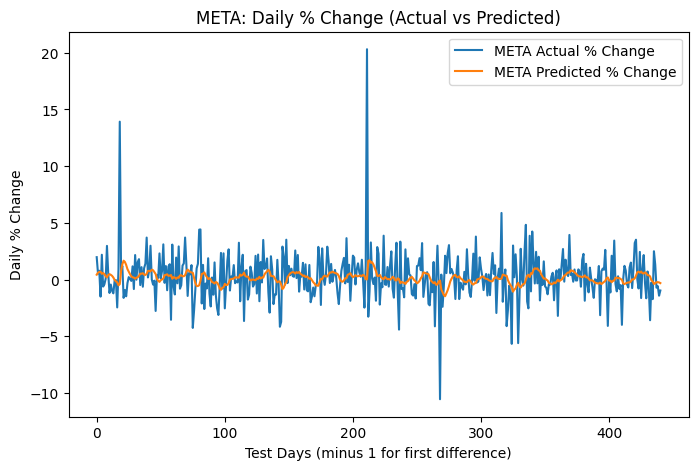

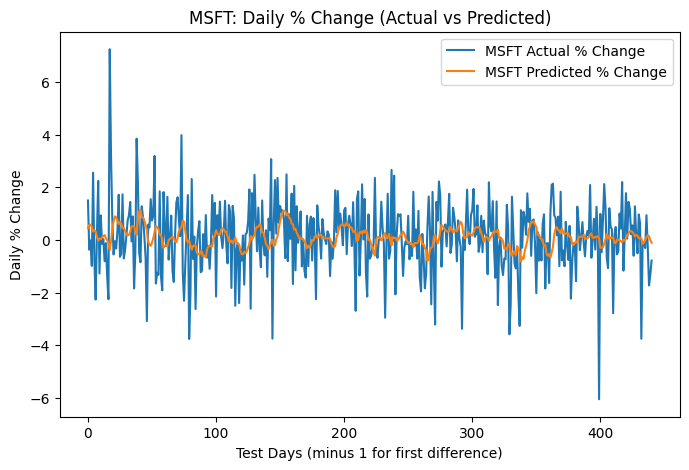

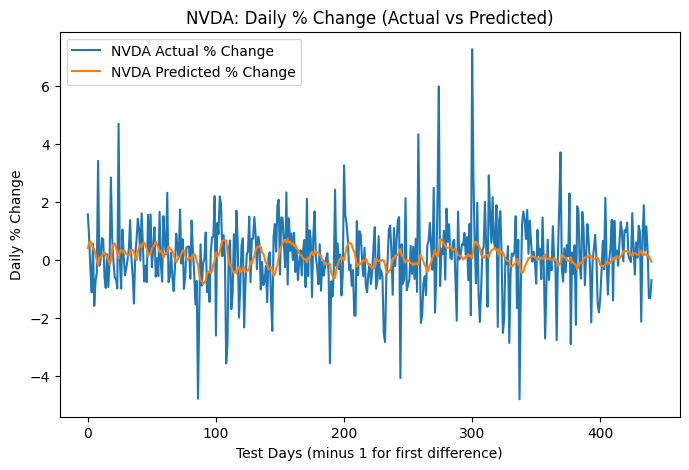

In [197]:
import matplotlib.pyplot as plt

for i, sym in enumerate(symbols_list):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test_true_pct[:, i], label=f"{sym} Actual % Change")
    plt.plot(y_test_pred_pct[:, i], label=f"{sym} Predicted % Change")
    plt.title(f"{sym}: Daily % Change (Actual vs Predicted)")
    plt.xlabel("Test Days (minus 1 for first difference)")
    plt.ylabel("Daily % Change")
    plt.legend()
    plt.show()


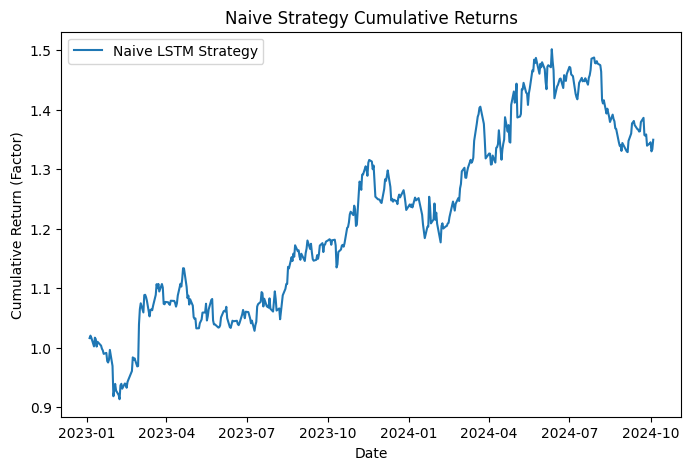

Final return over period: 34.94%


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.001] = 1
signals[predicted_changes < 0.001] = -1

# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (5) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (6) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (7) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (8) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="Naive LSTM Strategy")
plt.title("Naive Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (9) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period: {final_return * 100:.2f}%")


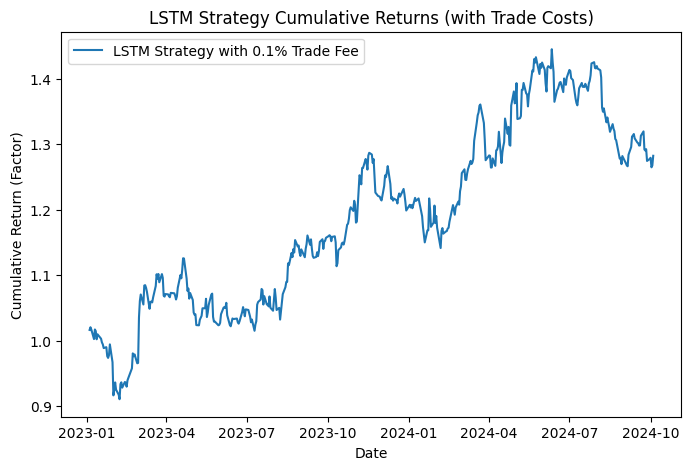

Final return over period (after fees): 28.23%


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.001] = 1
signals[predicted_changes < 0.001] = -1

# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Calculate **trade cost mask** (detect when a trade occurs)
# A trade occurs when today's position != yesterday's position
trade_mask = (signals[1:] != signals[:-1])  # Shape (N-2, 4)
trade_costs = trade_mask * 0.1  # 0.1% per trade

# (5) Apply transaction costs: 
# Deduct trade cost when we enter or exit a trade
daily_symbol_returns[1:] -= trade_costs  # First row has no cost (since no prior trade)

# (6) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (7) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (8) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (9) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (10) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="LSTM Strategy with 0.1% Trade Fee")
plt.title("LSTM Strategy Cumulative Returns (with Trade Costs)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (11) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period (after fees): {final_return * 100:.2f}%")
